In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from glob import glob
import pickle
from collections import OrderedDict

import matplotlib as mpl
mpl.rcParams["savefig.dpi"] = 300
#mpl.rcParams["font.size"] = 15
mpl.rcParams["lines.linewidth"] = 2
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

Results files should be made previously using:
`./alt_aggregate_results.py` and by setting the correct `date` and `regions`

In [2]:
test = True

pdf = True
svg = True

select_top_X = 10

# FINAL DATE
DATE = 'Aug04v1'

norm = {
    'ERCOT' : 26308, # Mean demand (MW) for file ERCOT_demand_synthetic_1950-2020_MEM.csv
    'CONUS' : 303461, # Mean demand (MW) for file CONUS_demand_synthetic_1950-2020_MEM.csv
}

year_range = range(1979, 2021)

In [3]:
def build_associated_df_NEW(df):
    
    cols = ['syst_cost', 'lost_load']
    for c in df.columns:
        if 'capacity' in c:
            cols.append(c)
    
    DF = {'n_years' : []}
    
    vals = ['min', 'max', 'mean', 'median', '25p', '75p', '90p', 'std']
    
    for col in cols:
        for val in vals:
            DF[f"{col}_{val}"] = []
    
    for NYEARS in df['n_years'].unique():
        tmp = df.loc[ (df['n_years'] == NYEARS) ]#& (df['test_year'] > 0) ]
        
        ### Some files did not finish
        if len(tmp.index) == 0:
            continue
        
        DF['n_years'].append(NYEARS)
        
        for col in cols:
            
            DF[f"{col}_min"].append(np.min(tmp[col]))
            DF[f"{col}_max"].append(np.max(tmp[col]))
            DF[f"{col}_mean"].append(np.mean(tmp[col]))
            DF[f"{col}_median"].append(np.median(tmp[col]))
            DF[f"{col}_25p"].append(np.percentile(tmp[col], 25))
            DF[f"{col}_75p"].append(np.percentile(tmp[col], 75))
            DF[f"{col}_90p"].append(np.percentile(tmp[col], 90))
            DF[f"{col}_std"].append(np.std(tmp[col]))
    
    DF = pd.DataFrame(DF)
    
    return DF

In [5]:
file_key = {
    'CONUS' : {
        #'SWB' : ['ALL',],
        #'SWBNG' : ['ALL',],
        #'SWBPGP' : ['ALL',],
        'SWB' : [DATE,],
        'SWBNG' : [DATE,],
        'SWBPGP' : [DATE,], 
    },
    #'ERCOT' : {
    #    'SWB' : ['Jan10v1',],
    #    'SWBNG' : ['Jan10v1',],
    #    'SWBPGP' : ['Jan10v1',],
    #    'SWB' : ['ALL',],
    #    'SWBNG' : ['ALL',],
    #    'SWBPGP' : ['ALL',],
    #},
}

def aggregate_results_files(region, techs, dates, post):
    
    files = [f"./n_years_{date}_{region}_{techs}{post}.csv" for date in dates]
    
    for i, f in enumerate(files):
        
        print(f"loading: {f}")
        
        if i == 0:
            df = pd.read_csv(f, index_col=False)
        else:
            tmp = pd.read_csv(f, index_col=False)
            df = df.append(tmp)
    
    return df

def load_data(file_key, test):

    post = '' if not test else '_TestArchs'
    dfs = {}
    df2s = {}
    for region, tech_list in file_key.items():
        print(region)
        dfs[region] = {}
        df2s[region] = {}
        for techs, dates in tech_list.items():
            print(f" --- {techs}, {dates}")
            
            df = aggregate_results_files(region, techs, dates, post)
            df = df.sort_values(by=['n_years', 'scale_factor'])
            df = df[ (df['opt_years'] < 25) | (df['opt_years'] >= 79)]
            df = df[ (df['test_years'] >= 1979) ]
            df.to_csv(f"./n_years_ALL_{region}_{techs}{post}.csv", index=False)
            dfs[region][techs] = df
            for NYEARS in df['n_years'].unique():
                print(f" ------ {NYEARS}: {len(df.loc[ df['n_years'] == NYEARS ].index)}")
    
            print(f" ------ TOTAL: {len(dfs[region][techs].index)}")
    
            df2 = build_associated_df_NEW(df)
            #print(df2)
            df2s[region][techs] = df2

    return dfs, df2s


dfs, df2s = load_data(file_key, test)

CONUS
 --- SWB, ['Aug04v1']
loading: ./n_years_Aug04v1_CONUS_SWB_TestArchs.csv
 ------ -1: 1722
 ------ TOTAL: 1722
 --- SWBNG, ['Aug04v1']
loading: ./n_years_Aug04v1_CONUS_SWBNG_TestArchs.csv
 ------ -1: 1722
 ------ TOTAL: 1722
 --- SWBPGP, ['Aug04v1']
loading: ./n_years_Aug04v1_CONUS_SWBPGP_TestArchs.csv
 ------ -1: 1722
 ------ TOTAL: 1722


CONUS dict_keys(['SWB', 'SWBNG', 'SWBPGP'])
SWB
1722
42


/home/truggles/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/truggles/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Saving: plots/all_Aug04v1_CONUS_SWB_LL_matrix.png
SWBNG
1722
42


/home/truggles/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/truggles/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Saving: plots/fig3.png
SWBPGP
1722
42


/home/truggles/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/truggles/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Saving: plots/all_Aug04v1_CONUS_SWBPGP_LL_matrix.png


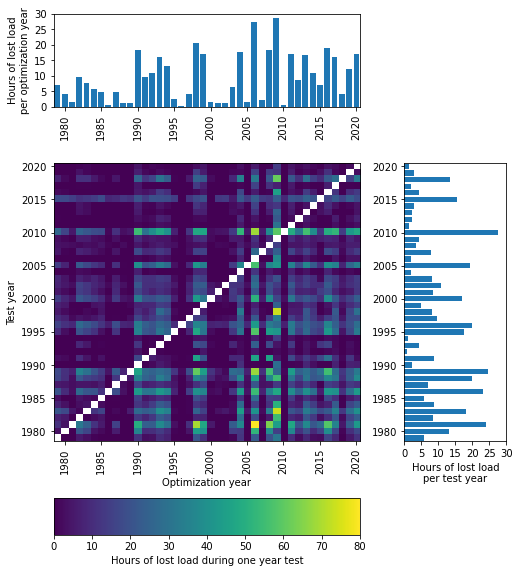

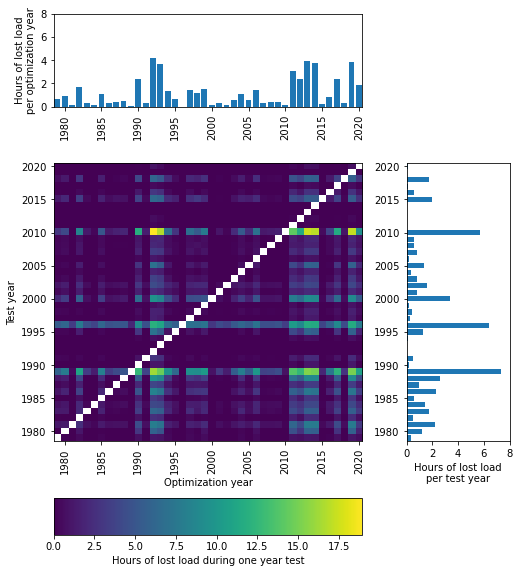

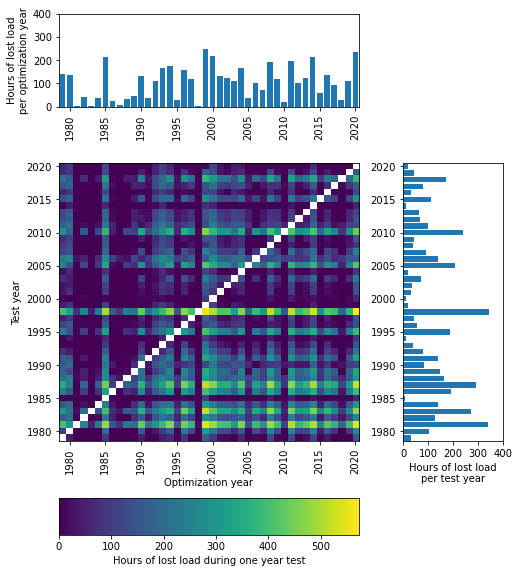

In [6]:
heights = {
    'CONUS' : {
        #'SWB' : [.0006, .002],
        #'SWBNG' : [.0001, .0005],
        'SWB' : [30, 5],
        'SWBNG' : [8, 2],
        'SWBPGP' : [400, 100],
    },
    'ERCOT' : {
        'SWB' : [.0005, .002],
        'SWBNG' : [.0005, .0005],
        'SWBPGP' : [.07, .07],
    },
}


def ll_matrix(save_name, region, techs, df, n_years, **kwargs):
    
    box = kwargs['box']
    box_factor = 3 if techs != 'SWBPGP' else 2
    if not box:
        box_factor = 1
    
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7.3, 8), 
                            gridspec_kw={'width_ratios': [3, 1], 'height_ratios': [1, 3, 0.4]})
    
    fig.patch.set_facecolor('white')

    dfx = df[ df['n_years'] == n_years ]
    print(len(dfx.index))
    
    # Loop through results and fill matrix of lists based on LL.
    # Each LL value is filled by optimized years and tested year.
    denom = norm[region]
    m = [[[] for _ in year_range] for _ in year_range]
    for idx in dfx.index:
        ll = dfx.loc[idx, 'lost_load']/denom
        test_yr = dfx.loc[idx, 'test_years']
        opt_str = str(dfx.loc[idx, 'opt_years'])
        opt_vect = opt_str.split('-')
        for yr in opt_vect:
            yr = int(yr)
            if yr < 25:
                opt_yr = 2000+yr
            else:
                opt_yr = 1900+yr
            if test_yr == opt_yr: # Some bugs let a few of these through
                continue
            m[year_range.index(test_yr)][year_range.index(opt_yr)].append(ll)
        
        #print(test_yr, opt_yrs, ll)
    print(len(m))
    m2 = []
    mx_box, my_box = [[] for _ in year_range], [[] for _ in year_range]
    for i, row in enumerate(m):
        m2.append([])
        for j, vect in enumerate(row):
            app = np.mean(m[i][j])*8760
            m2[-1].append( app )
            if np.isnan( app ):
                continue
            if box:
                mx_box[i].append( app )
                my_box[j].append( app )
    matrix = np.array(m2)
    im = axs[1][0].imshow(matrix, interpolation='none', origin='lower', aspect='auto',
                         #norm=mpl.colors.LogNorm()
                         )
        
    cbar = fig.colorbar(im, cax=axs[2][0], orientation='horizontal')
    cbar.set_label("Hours of lost load during one year test")
    dec = 2
    #cbar.ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1, decimals=dec))            
    
    axs[1][0].set_xticks(np.arange(1, 42, step=5))
    axs[1][0].set_xticklabels([1980+val for val in np.arange(0, 42, step=5)])
    plt.setp( axs[1][0].xaxis.get_majorticklabels(), rotation=90 )
    axs[1][0].set_xlabel('Optimization year')
    axs[1][0].set_yticks(np.arange(1, 42, step=5))
    axs[1][0].set_yticklabels([1980+val for val in np.arange(0, 42, step=5)])
    axs[1][0].set_ylabel('Test year')
    
    # x hist
    x_means = np.nanmean(matrix, axis=0)
    if box:
        axs[0][0].boxplot(my_box, whis=(5, 95))
        axs[0][0].set_ylim(0, heights[region][techs][0] * box_factor)
        axs[0][0].set_xticks(np.arange(2, 43, step=5))
        axs[0][0].set_xticklabels([1980+val for val in np.arange(0, 42, step=5)])
    else:
        axs[0][0].bar(year_range, x_means, ls='-')
        axs[0][0].set_ylim(0, heights[region][techs][0])
        axs[0][0].set_xlim(year_range[0] - 0.5, year_range[-1] + 0.5)
        axs[0][0].xaxis.set_major_locator(mpl.ticker.MultipleLocator(base=5))
    #axs[0][0].set_xlim(1979-.5, 2020+.5)
    axs[0][0].set_ylabel('Hours of lost load\nper optimization year')
    axs[0][0].yaxis.set_major_locator(mpl.ticker.MultipleLocator(
        base=heights[region][techs][1] * box_factor))
    plt.setp( axs[0][0].xaxis.get_majorticklabels(), rotation=90 )
    dec = 3
    #axs[0][0].yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1, decimals=dec))
    y_means = np.nanmean(matrix, axis=1)
    if box:
        axs[1][1].boxplot(mx_box, whis=(5, 95), vert=False)
        axs[1][1].set_xlim(0, heights[region][techs][0] * box_factor)
        axs[1][1].set_yticks(np.arange(2, 43, step=5))
        axs[1][1].set_yticklabels([1980+val for val in np.arange(0, 42, step=5)])
    else:
        axs[1][1].barh(year_range, y_means, ls='-')
        axs[1][1].set_xlim(0, heights[region][techs][0])
        axs[1][1].set_ylim(year_range[0] - 0.5, year_range[-1] + 0.5)
        axs[1][1].yaxis.set_major_locator(mpl.ticker.MultipleLocator(base=5))
    #axs[1][1].set_ylim(1979-.5, 2020+.5)
    axs[1][1].xaxis.set_major_locator(mpl.ticker.MultipleLocator(
        base=heights[region][techs][1] * box_factor))
    #axs[1][1].xaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1, decimals=dec))
    axs[1][1].set_xlabel('Hours of lost load\nper test year')
    
    
    
    
    
    dfx = pd.DataFrame({'year':year_range, 'optimized_LL':x_means, 'tested_LL':y_means})
    dfx.to_csv(f'{save_name}_LL_summary.csv')
    
    # Hide top right and bottom right axes
    axs[0][1].axis('off')
    axs[2][1].axis('off')
    
    #axs[1][1].text(35, 100, f"{kwargs['title']}")
    if 'title' in kwargs.keys():
        fig.text(.73, .8, f"{kwargs['title']}", fontdict={'size':20})


    plt.tight_layout(pad=1)
    #plt.tight_layout()
    app = '' if not box else '_box'
    if 'SWBNG' in save_name:
        save_name = 'fig3'
    if pdf:
        plt.savefig(f"plots/{save_name}{app}.pdf")
    if svg:
        plt.savefig(f"plots/{save_name}{app}.svg")
    plt.savefig(f"plots/{save_name}{app}.png")
    print(f"Saving: plots/{save_name}{app}.png")
    return



kwargs = {}
kwargs['box'] = False
n_years = -1
for region, tech_list in dfs.items():
    print(region, tech_list.keys())

    for techs, df in tech_list.items():
        print(techs)
        
        kwargs['title'] = f""
        ll_matrix(f"all_{DATE}_{region}_{techs}_LL_matrix",
                region, techs, dfs[region][techs], n_years, **kwargs)

#kwargs['box'] = True
#for region, tech_list in dfs.items():
#    print(region, tech_list.keys())
#
#    for techs, df in tech_list.items():
#        print(techs)
#        
#        kwargs['title'] = f""
#        ll_matrix(f"all_{DATE}_{region}_{techs}_LL_matrix",
#                region, techs, dfs[region][techs], n_years, **kwargs)

# Figure 4

Saving: plots/fig4.png


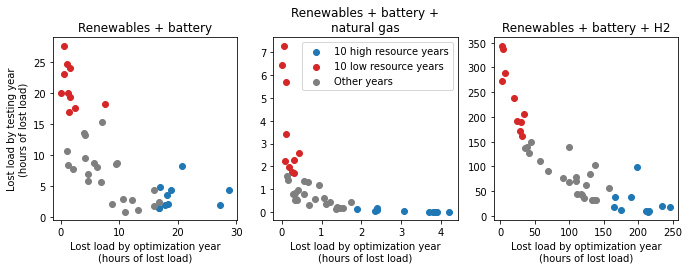

In [8]:
title_map = {
    'SWB' : 'Renewables + battery',
    'SWBNG' : 'Renewables + battery +\nnatural gas',
    'SWBPGP' : 'Renewables + battery + H2'
}

 

# Select top X from each and rest
def get_groupings(df, techs):
    

    all_idx = list(df.index)
    
    idx_top_X_opt = []
    df = df.sort_values(['optimized_LL',], ascending=False)
    for i, idx in enumerate(df.index, start=1):
        idx_top_X_opt.append(idx)
        if i >= select_top_X:
            break
    idx_top_X_test = []
    df = df.sort_values(['tested_LL',], ascending=False)
    for i, idx in enumerate(df.index, start=1):
        idx_top_X_test.append(idx)
        if i >= select_top_X:
            break
    #print(idx_top_X_opt)
    #print(idx_top_X_test)
    idx_others = []
    for idx in df.index:
        if idx not in idx_top_X_opt and idx not in idx_top_X_test:
            idx_others.append(idx)
    
    dfOpt = df.loc[idx_top_X_opt]
    dfTest = df.loc[idx_top_X_test]
    dfOther = df.loc[idx_others]
    dfOpt.to_csv(f'May31v2_CONUS_{techs}_max_LL_opt_years.csv')
    dfTest.to_csv(f'May31v2_CONUS_{techs}_max_LL_test_years.csv')
    dfOther.to_csv(f'May31v2_CONUS_{techs}_max_LL_other_years.csv')
    
    return {f'{select_top_X} high resource years': dfOpt, 
            f'{select_top_X} low resource years': df.loc[idx_top_X_test], 
            'Other years': df.loc[idx_others]}
    

group_colors = {
    f'{select_top_X} high resource years': 'C0', 
    f'{select_top_X} low resource years': 'C3', 
    'Other years': 'C7'
}

    
    
def plot_LL_for_region():
    
    cols = 3
    fig, axs = plt.subplots(ncols=cols, figsize=((3+cols*3)*.8, 4.8*.8))
    if cols == 1:
        axs = [axs,]
    fig.patch.set_facecolor('white')
        
    i = 0
    for techs in ['SWB', 'SWBNG', 'SWBPGP']:

        df = pd.read_csv(f'all_May31v2_CONUS_XXX_LL_matrix_LL_summary.csv'.replace('XXX',techs))
        
        # Just added y-axis that we're showing power capacity
        denom = norm['CONUS']

        for group, dfx in get_groupings(df, techs).items():
            axs[i].scatter(dfx['optimized_LL'], dfx['tested_LL'], color=group_colors[group], label=group)
        axs[i].set_title(title_map[techs])
        axs[i].set_xlabel('Lost load by optimization year\n(hours of lost load)')
        i += 1
    axs[0].set_ylabel('Lost load by testing year\n(hours of lost load)')
    axs[-2].legend(loc='upper right')
    
    plt.tight_layout(pad=1)
    if pdf:
        plt.savefig("plots/fig4.pdf")
    if svg:
        plt.savefig("plots/fig4.svg")
    plt.savefig("plots/fig4.png")
    print(f"Saving: plots/fig4.png")
    return

plot_LL_for_region()